In [1]:
from basicpy import BaSiC
import numpy as np

import zarr
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
path = '/u/home/f/f7xiesnm/project-zipursky/data/hold/sparse06/r1_export.n5'
# path = "/u/scratch/f/f7xiesnm/lt172_gene_r1/dataset.n5"
zarr_data = zarr.open(store=zarr.N5Store(path), mode='r')

tileshape = zarr_data[f'c0/s4'].shape
print(tileshape)

(354, 495, 620)


In [3]:
n = tileshape[0]

In [4]:
images = zarr_data[f'c0/s4'][...]
images.shape

(354, 495, 620)

In [5]:
images = images.astype(np.float16)
images = np.clip(images-90, 0, None) # .astype(np.float16)

In [6]:
%%time
basic = BaSiC(get_darkfield=False, smoothness_flatfield=1)
basic.fit(images)
images_transformed = (images - basic.darkfield[np.newaxis])/ basic.flatfield[np.newaxis]

Single-step optimization did not converge at the last reweighting step.


CPU times: user 3min 37s, sys: 25.8 s, total: 4min 3s
Wall time: 1min 24s


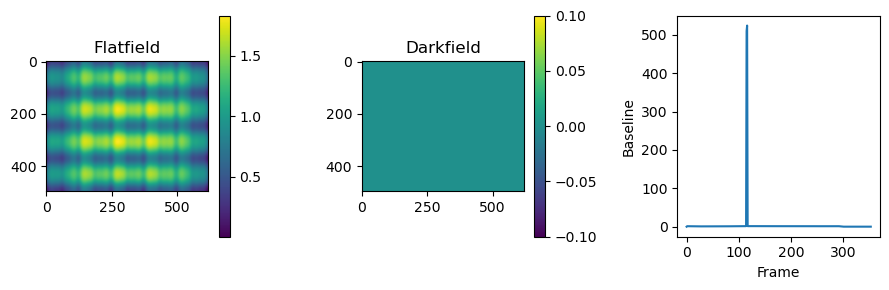

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3))
im = axes[0].imshow(basic.flatfield)
fig.colorbar(im, ax=axes[0])
axes[0].set_title("Flatfield")
im = axes[1].imshow(basic.darkfield)
fig.colorbar(im, ax=axes[1])
axes[1].set_title("Darkfield")
axes[2].plot(basic.baseline)
axes[2].set_xlabel("Frame")
axes[2].set_ylabel("Baseline")
fig.tight_layout()

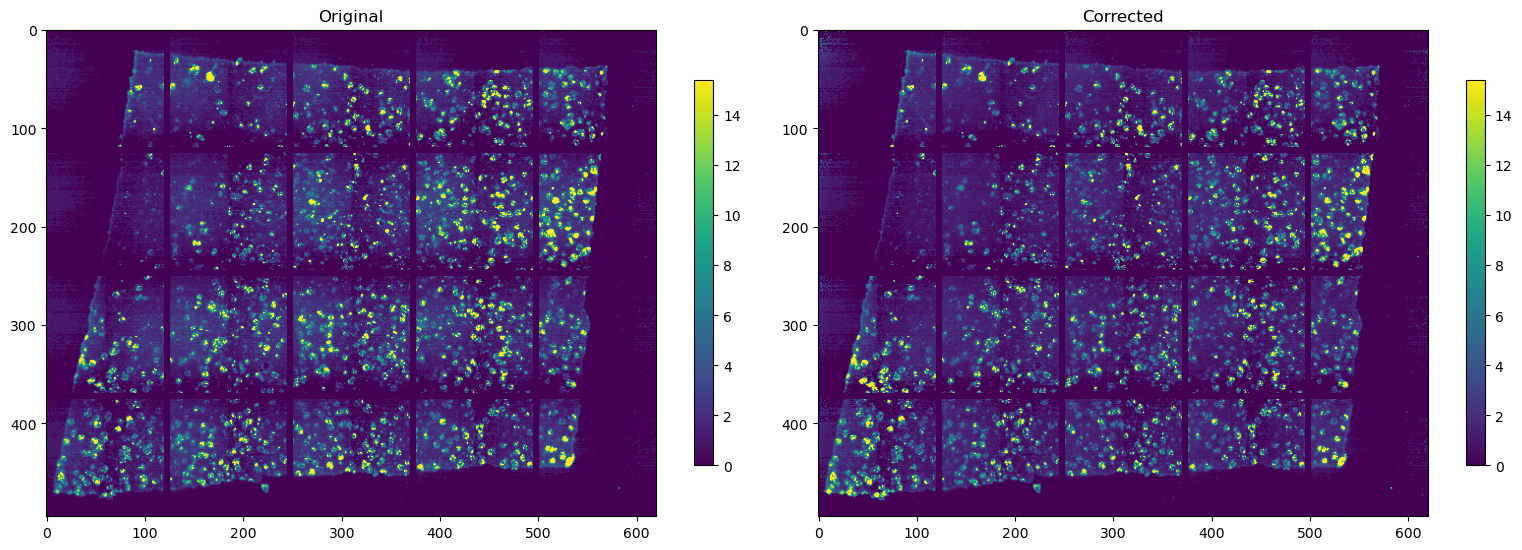

In [8]:
i = 100

vmin = np.percentile(images_transformed[i], 5)
vmax = np.percentile(images_transformed[i], 99)

fig, axes = plt.subplots(1, 2, figsize=(16,8))
im = axes[0].imshow(images[i], vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[0], shrink=0.5)
axes[0].set_title("Original")
im = axes[1].imshow(images_transformed[i], vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[1], shrink=0.5)
axes[1].set_title("Corrected")
fig.tight_layout()

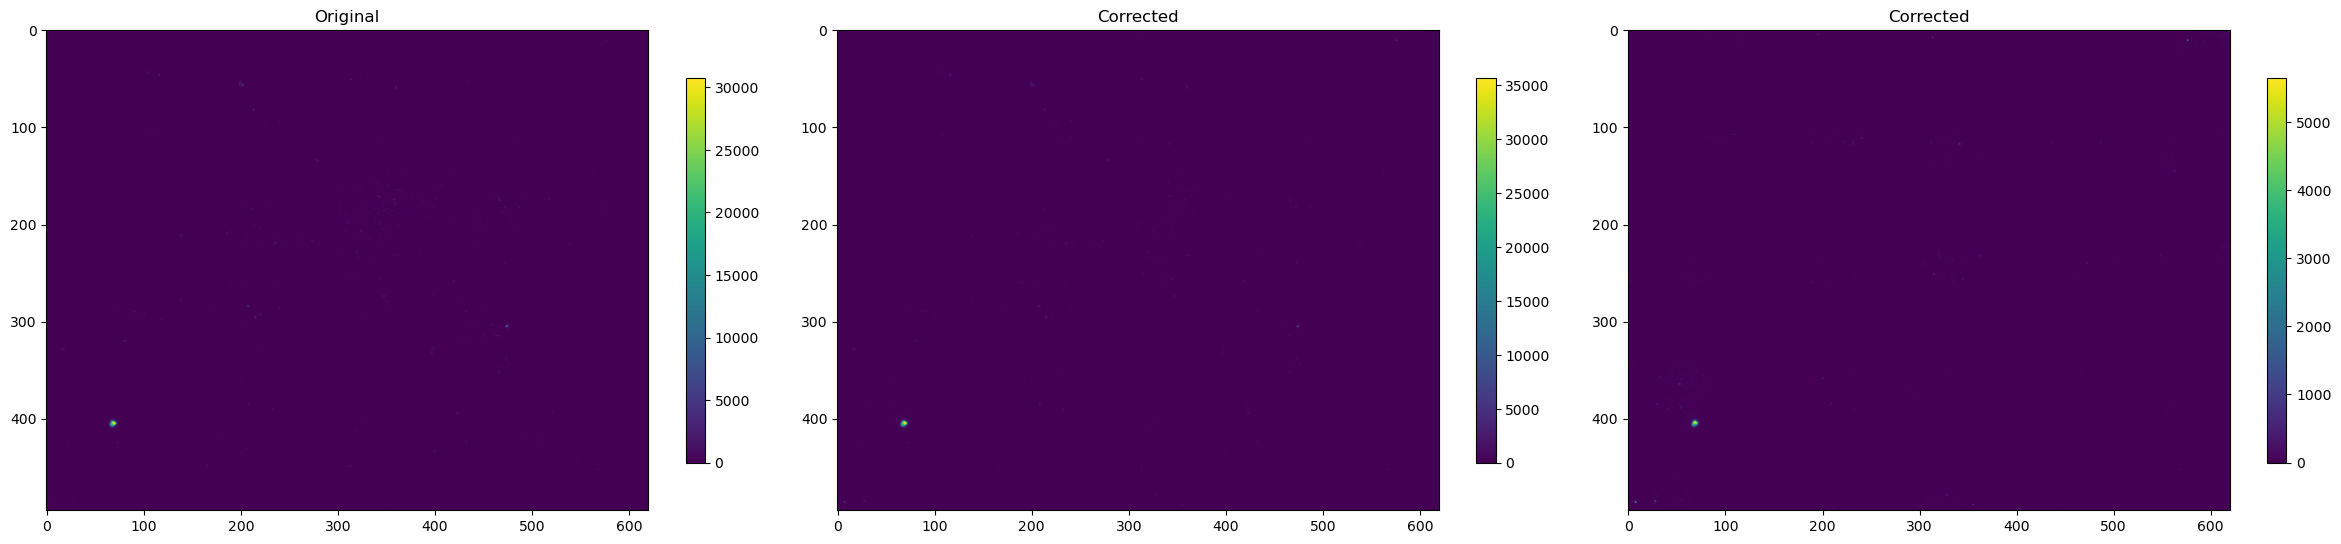

In [9]:
i = 50

vmin = np.percentile(images_transformed, 5)
vmax = np.percentile(images_transformed, 99)

fig, axes = plt.subplots(1, 3, figsize=(8*3,8))
im = axes[0].imshow(np.max(images, axis=0)) #, vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[0], shrink=0.5)
axes[0].set_title("Original")
im = axes[1].imshow(np.max(images_transformed, axis=0)) #, vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[1], shrink=0.5)
axes[1].set_title("Corrected")

im = axes[2].imshow(np.max(images_transformed-images, axis=0)) # -np.max(images, axis=0))
fig.colorbar(im, ax=axes[2], shrink=0.5)
axes[2].set_title("Corrected")
fig.tight_layout()

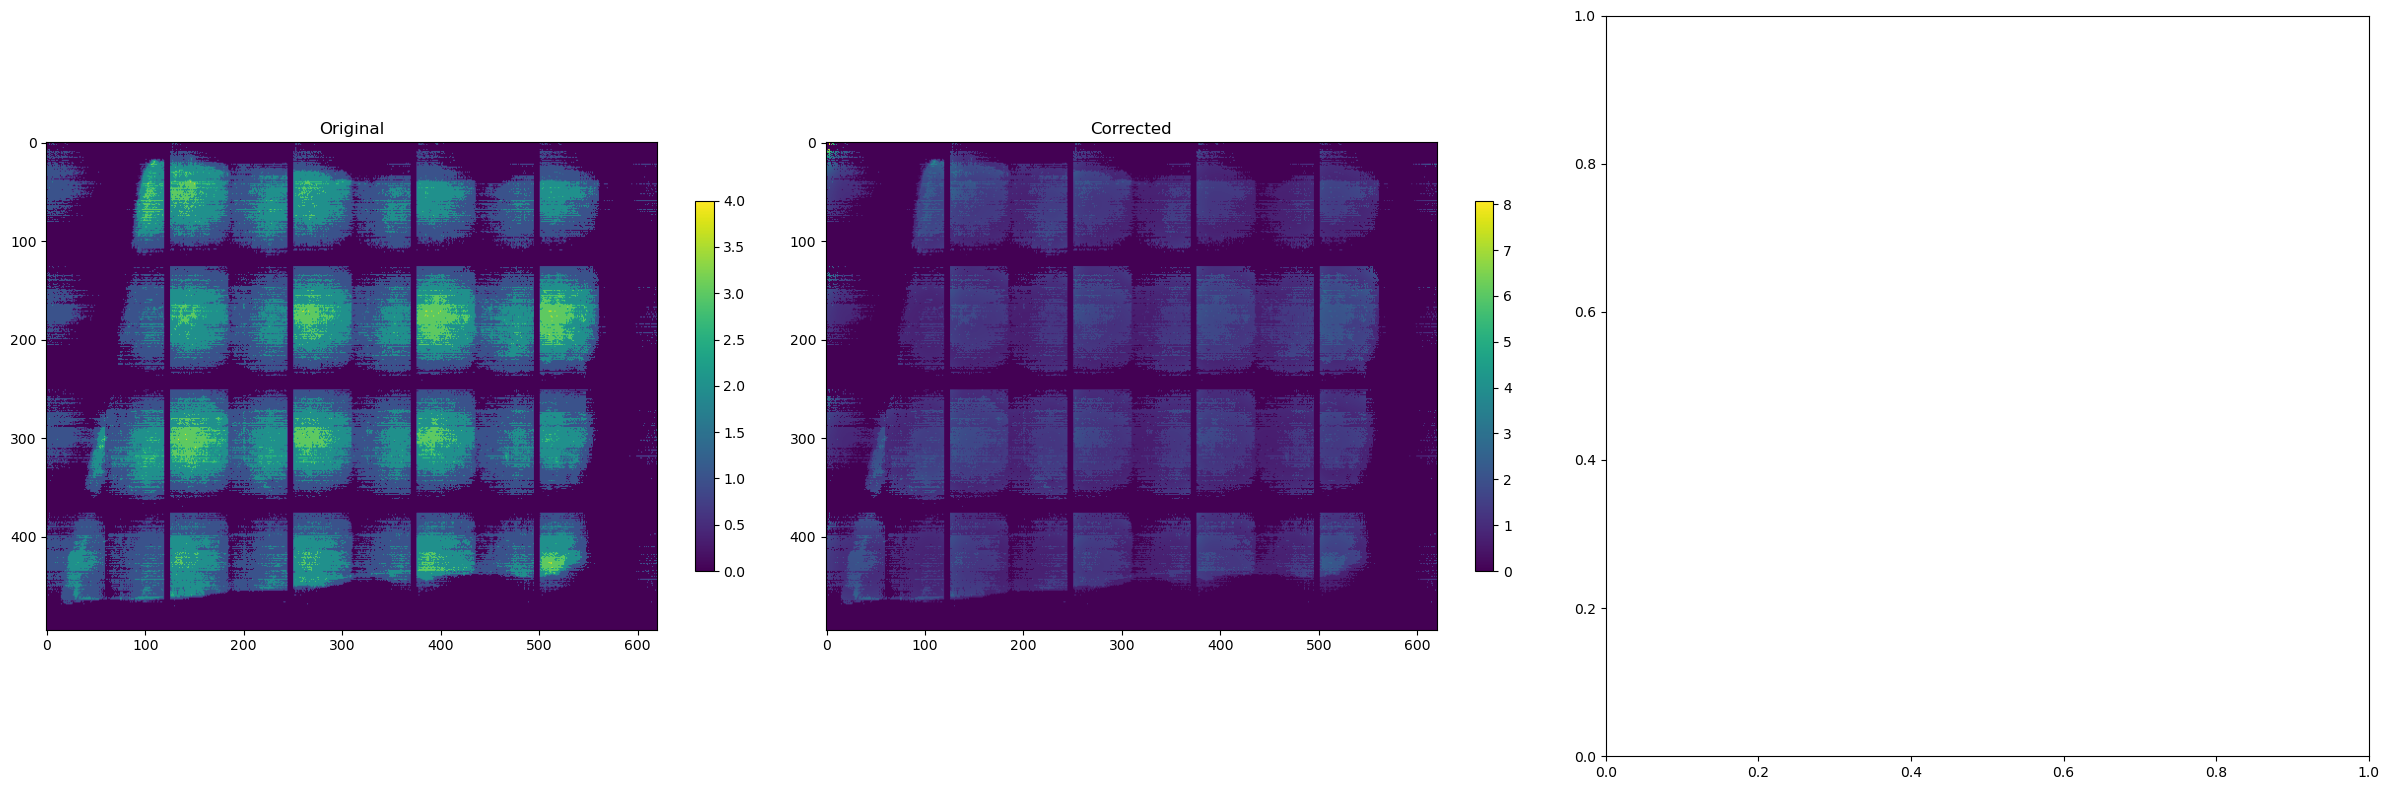

In [10]:
i = 50

vmin = np.percentile(images_transformed, 5)
vmax = np.percentile(images_transformed, 99)

fig, axes = plt.subplots(1, 3, figsize=(8*3,8))
im = axes[0].imshow(np.median(images, axis=0)) #, vmin=90, vmax=94)#, vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[0], shrink=0.5)
axes[0].set_title("Original")
im = axes[1].imshow(np.median(images_transformed, axis=0)) # , vmin=90, vmax=94) #, vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[1], shrink=0.5)
axes[1].set_title("Corrected")

# im = axes[2].imshow(np.median(images_transformed-images, axis=0)) # -np.max(images, axis=0))
# fig.colorbar(im, ax=axes[2], shrink=0.5)
# axes[2].set_title("Diff")
fig.tight_layout()

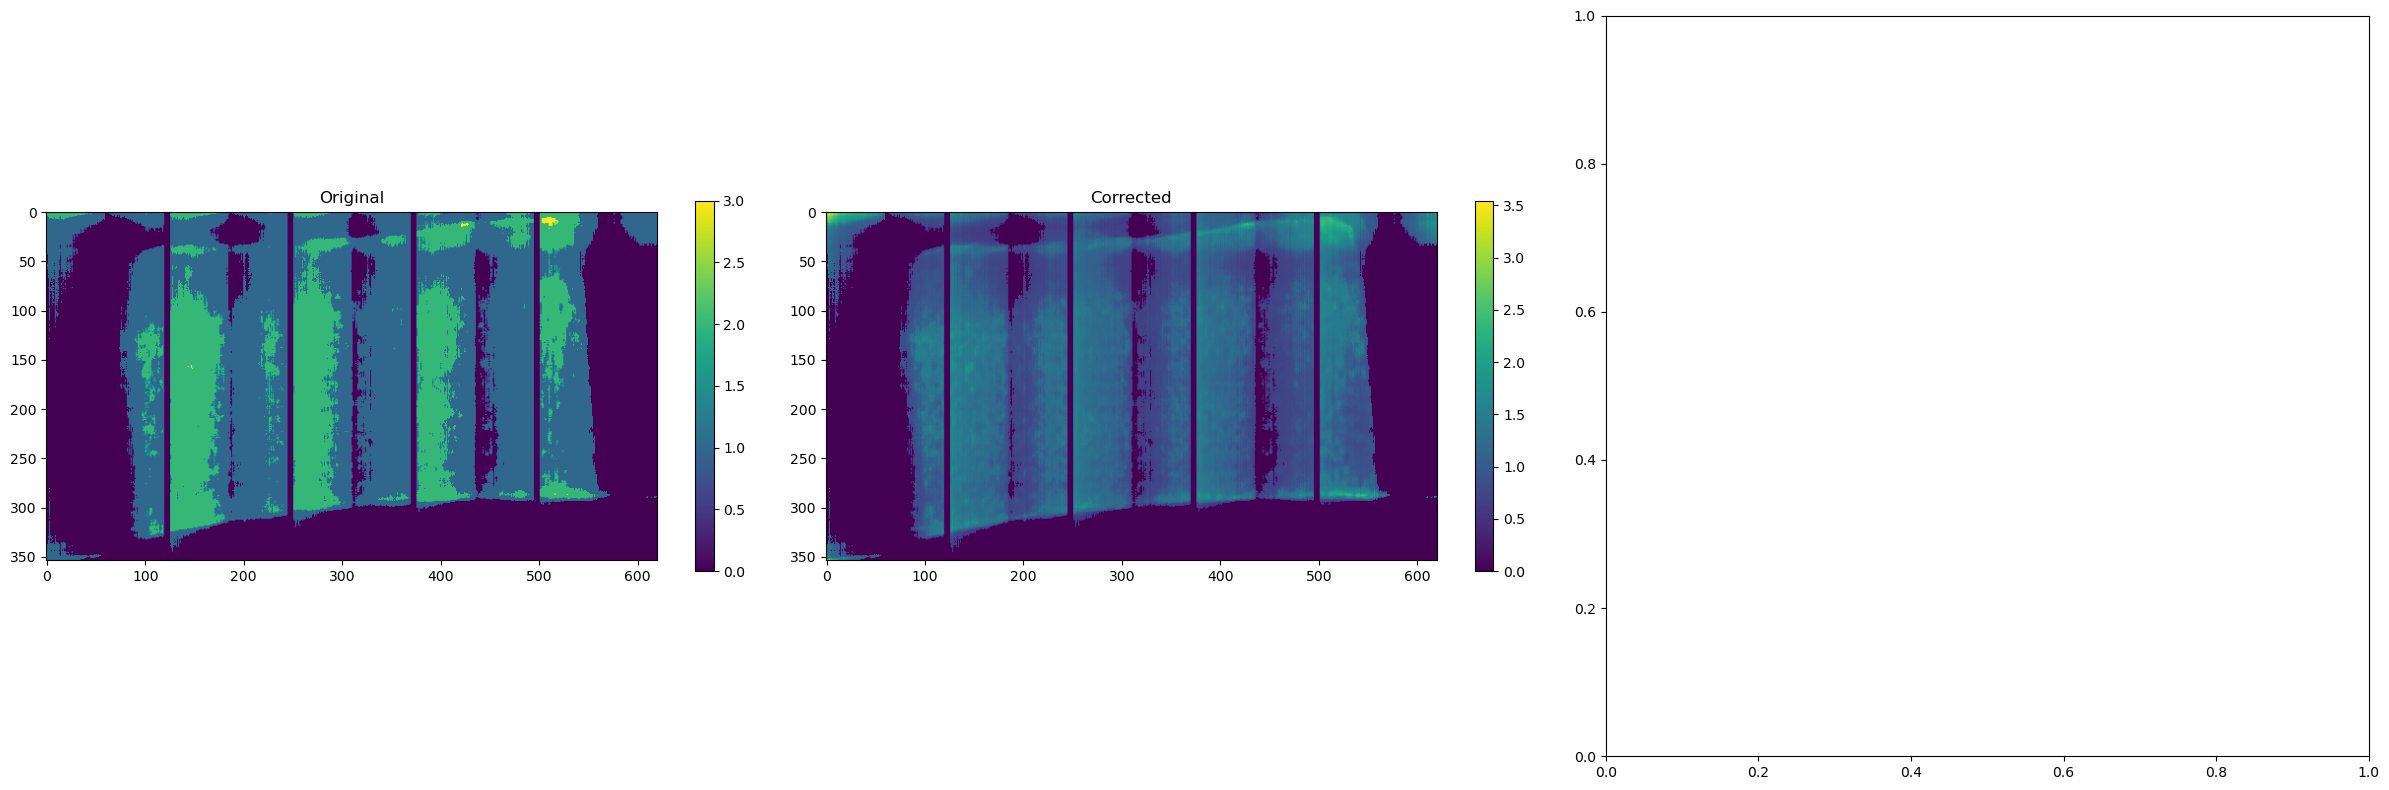

In [11]:

vmin = np.percentile(images_transformed, 5)
vmax = np.percentile(images_transformed, 99)

fig, axes = plt.subplots(1, 3, figsize=(8*3,8))
im = axes[0].imshow(np.median(images, axis=1)) #, vmin=90, vmax=95)#, vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[0], shrink=0.5)
axes[0].set_title("Original")
im = axes[1].imshow(np.median(images_transformed, axis=1)) # , vmin=90, vmax=95) #, vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[1], shrink=0.5)
axes[1].set_title("Corrected")

# im = axes[2].imshow(np.median(images_transformed-images, axis=1)) # -np.max(images, axis=0))
# fig.colorbar(im, ax=axes[2], shrink=0.5)
# axes[2].set_title("Diff")
fig.tight_layout()

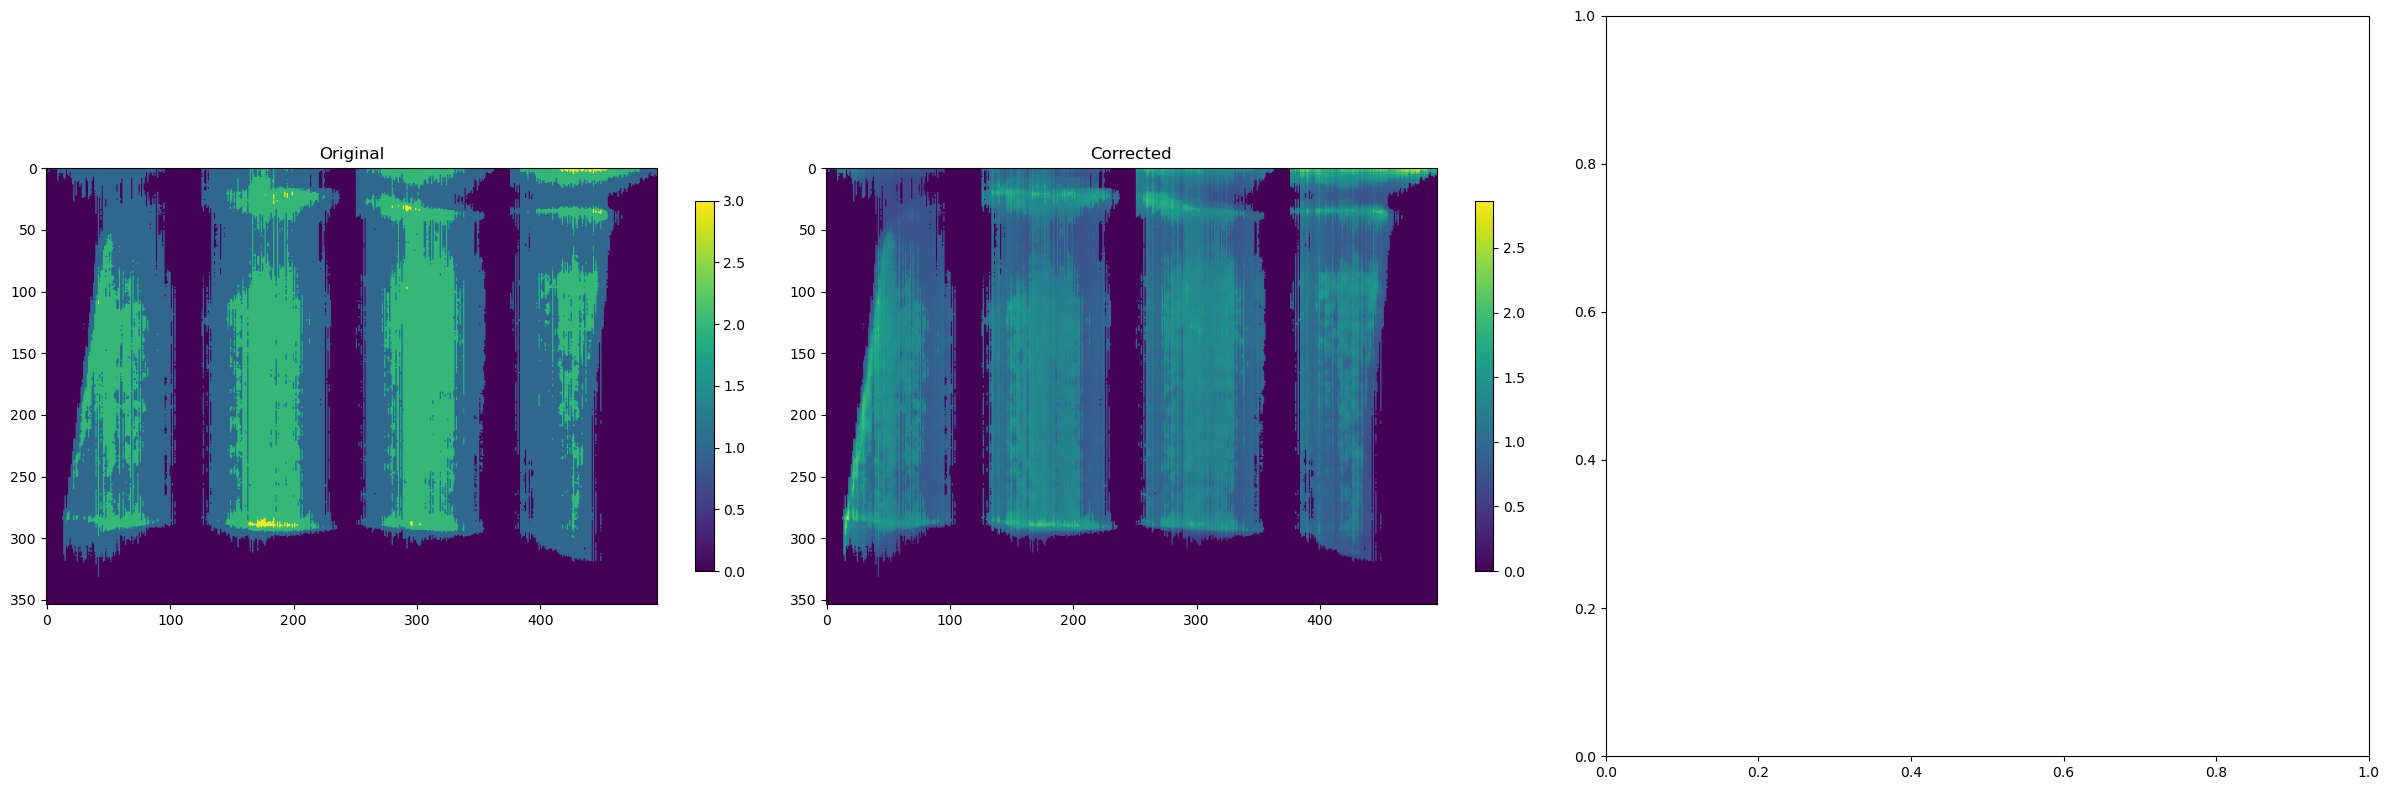

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(8*3,8))
im = axes[0].imshow(np.median(images, axis=2)) #, vmin=90, vmax=95)#, vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[0], shrink=0.5)
axes[0].set_title("Original")
im = axes[1].imshow(np.median(images_transformed, axis=2)) # , vmin=90, vmax=95) #, vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[1], shrink=0.5)
axes[1].set_title("Corrected")

# im = axes[2].imshow(np.median(images_transformed-images, axis=1)) # -np.max(images, axis=0))
# fig.colorbar(im, ax=axes[2], shrink=0.5)
# axes[2].set_title("Diff")
fig.tight_layout()